# **Assignment 4.1: Mood Detection**

**Name:** Tacsay, Marie Emmanuelle
<br> **Section:** CPE32S8
<br> **Instructor:** Engr. Roman Richard

In [17]:
import numpy as np
import os
import errno
import sys
import cv2
import glob
import sys

In [ ]:
#.py file used to capture images for data

"""import cv2
import os

def detect(folder_path):

    face_cascade = cv2.CascadeClassifier(r"C:\Users\emtac\Documents\ComVisionMats\haarcascade_frontalface_default.xml")
    eye_cascade = cv2.CascadeClassifier(r"C:\Users\emtac\Documents\ComVisionMats\haarcascade_eye.xml")
    camera = cv2.VideoCapture(0)

    i = 0  # Counter for saving images

    while True:
        ret, frame = camera.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces:
            img = cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

            roi_gray = gray[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray, 1.03, 5, 0, (40, 40))

            #for (ex, ey, ew, eh) in eyes:
                #cv2.rectangle(img, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

            # Save the detected face region with a descriptive filename:
            face_filename = f"detected_face_{i}.jpg"
            face_path = os.path.join(folder_path, face_filename)
            cv2.imwrite(face_path, roi_gray)
            i += 1

            # Display the frame with detected faces and eye rectangles:
            cv2.imshow("camera", frame)

        if cv2.waitKey(1000 // 12) & 0xff == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    # Specify the folder path where you want to save detected faces:
    folder_path = r"C:\Users\emtac\Documents\ComVisionMats\trial_mood\Sad" # Replace with your actual folder path
    detect(folder_path)"""

In [18]:
def read_images(path, sz=None): #function to read directory
  c = 0
  X, y = [], []

  for dirname, dirnames, filenames in os.walk(path):
    for subdirname in dirnames:
      subject_path = os.path.join(dirname, subdirname)
      for filename in os.listdir(subject_path):
        try:
          if(filename == ".directory"):
            continue
          filepath = os.path.join(subject_path, filename)
          im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

          # Resize the images to the prescribed size
          if (sz is not None):
            im = cv2.resize(im, (200,200))

          X.append(np.asarray(im, dtype=np.uint8))
          y.append(c)

        except IOError as e:
          print(f"I/O Error({e.errno}): {e.strerror}")
        except:
          print("Unexpected error:", sys.exc_info()[0])
          raise
      c = c+1
  return [X, y]

In [36]:
def face_rec():
  moods = ['Angry', 'Confused', 'Happy', 'Sad'] # Moods
  names = ['You']
  unknown_label = 'unknown'
  if len(sys.argv) < 2:
    print("USAGE: facerec_demo.py </path/to/images> [</path/to/store/images/at>]")
    sys.exit()

  [X, y] = read_images(r"C:\Users\emtac\Documents\ComVisionMats\trial_mood",(200,200))
  y = np.asarray(y, dtype=np.int32)

  model = cv2.face.LBPHFaceRecognizer_create() #model
  model.train(X, y)

  camera = cv2.VideoCapture(0)
  face_cascade = cv2.CascadeClassifier('C:/Users/emtac/Documents/ComVisionMats/haarcascade_frontalface_default.xml')

  while True:
    ret, img = camera.read()
    if not ret:
      break

    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
      gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
      roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

      try:
        params = model.predict(roi)
        label_mood = moods[params[0]]
        
        if params[1] < 80 :  # This would predict if it is your face or not through the threshold or confidence level
              label = names[0] #this will display the element inside the list in variable name which is "You", pertaining to the person on the camera
        else:
              label = unknown_label #else it will display "unknown"
        cv2.putText(img, label + ', ' + 'Mood: ' + label_mood + ', ' +str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
      except:
        continue

    cv2.imshow("camera", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
  face_rec()


## **Steps Taken for this Activity**
1. Using a python file in which it will capture the faces of different moods, it will create number of images that will use as the data to train for the model to learn and detect faces. 
See the image below:
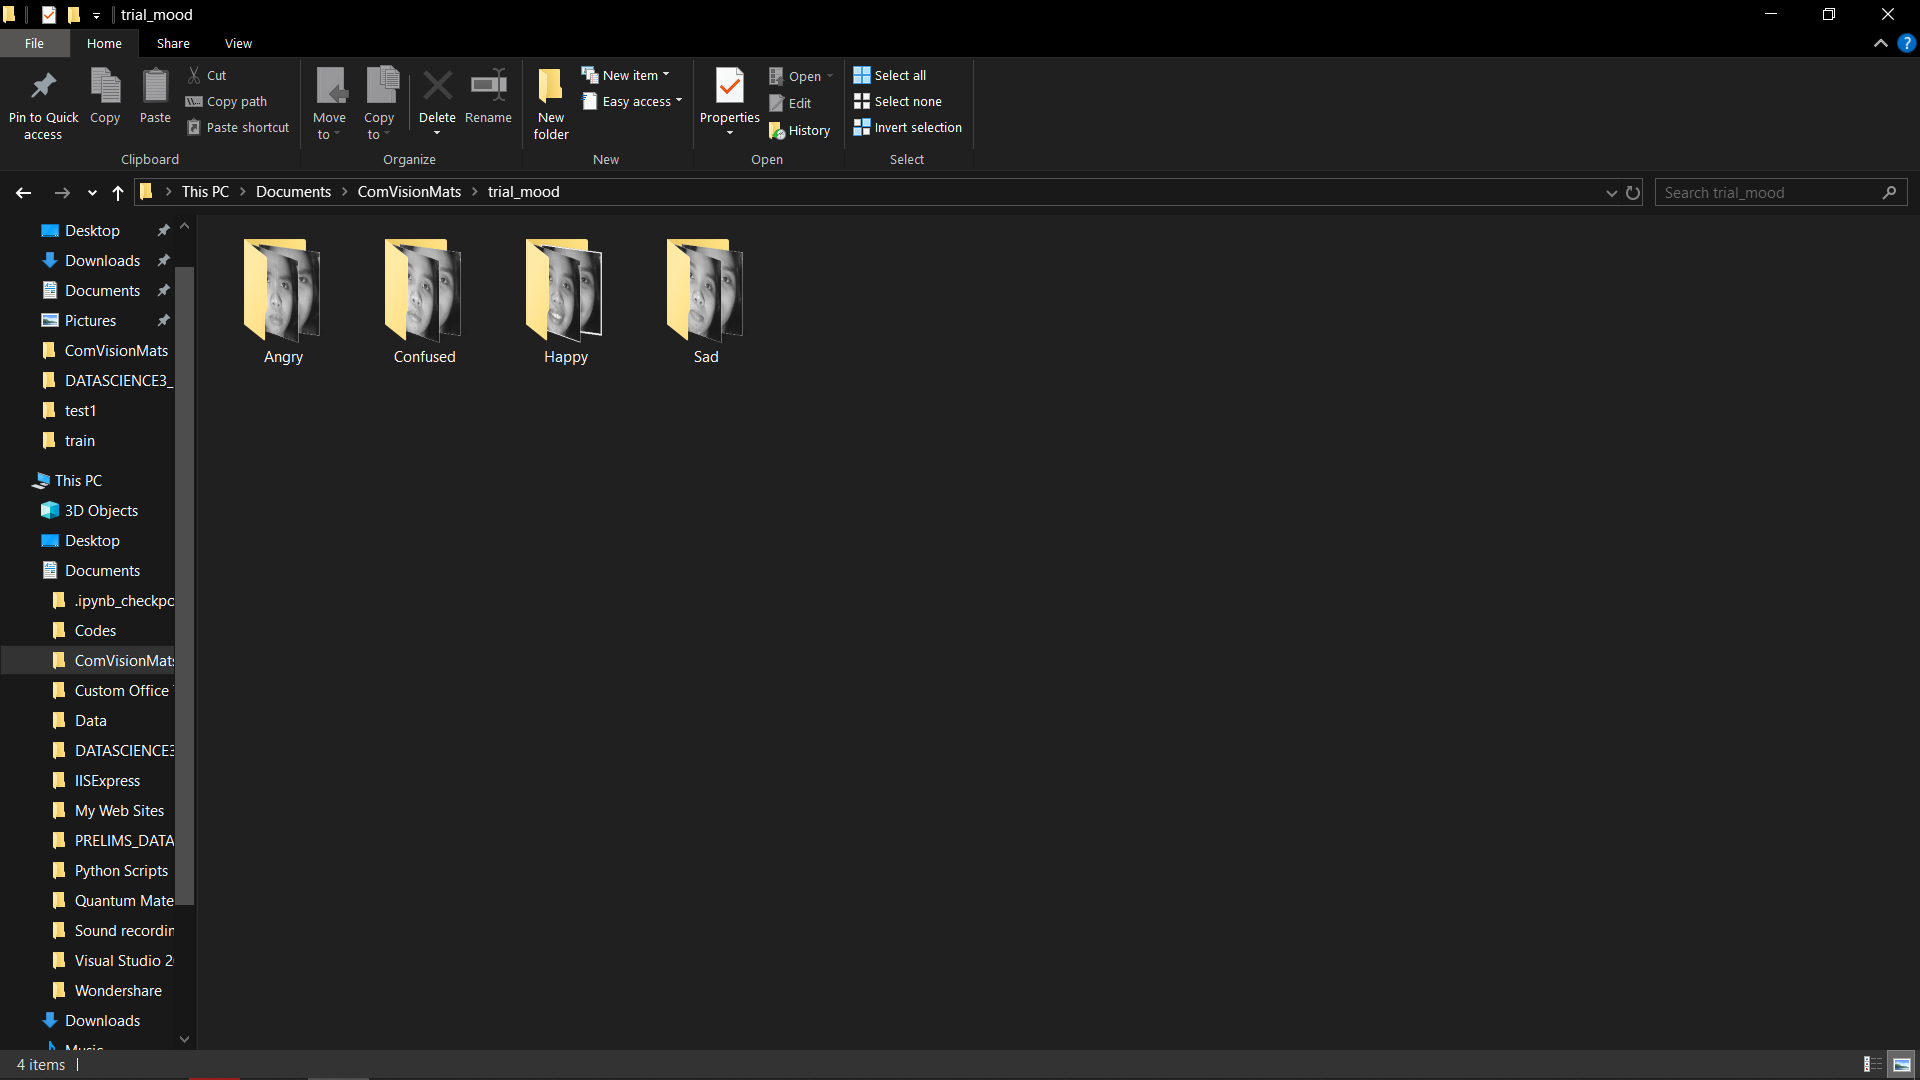
2. Each moods has its own folder in order to have labels wherein the model can use to based in recognizing these moods.
3. Using the codes of the last Hands-On Activity, recognizing these different moods are possible.
4. To recognize whether it is my face or not, I used the confidence level (param[1]) in order to determine if the face in front of the camera is detectable or not and if it matches the data inserted. Through this, if the confidence level would be less than 80, it will display the label included in the list of names otherwise, it will display "unknown".
5. Running the code would be able to determine if the parameters inserted are working.
6. See the images below for the results


## **Results:**

## **Happy (Mood)**

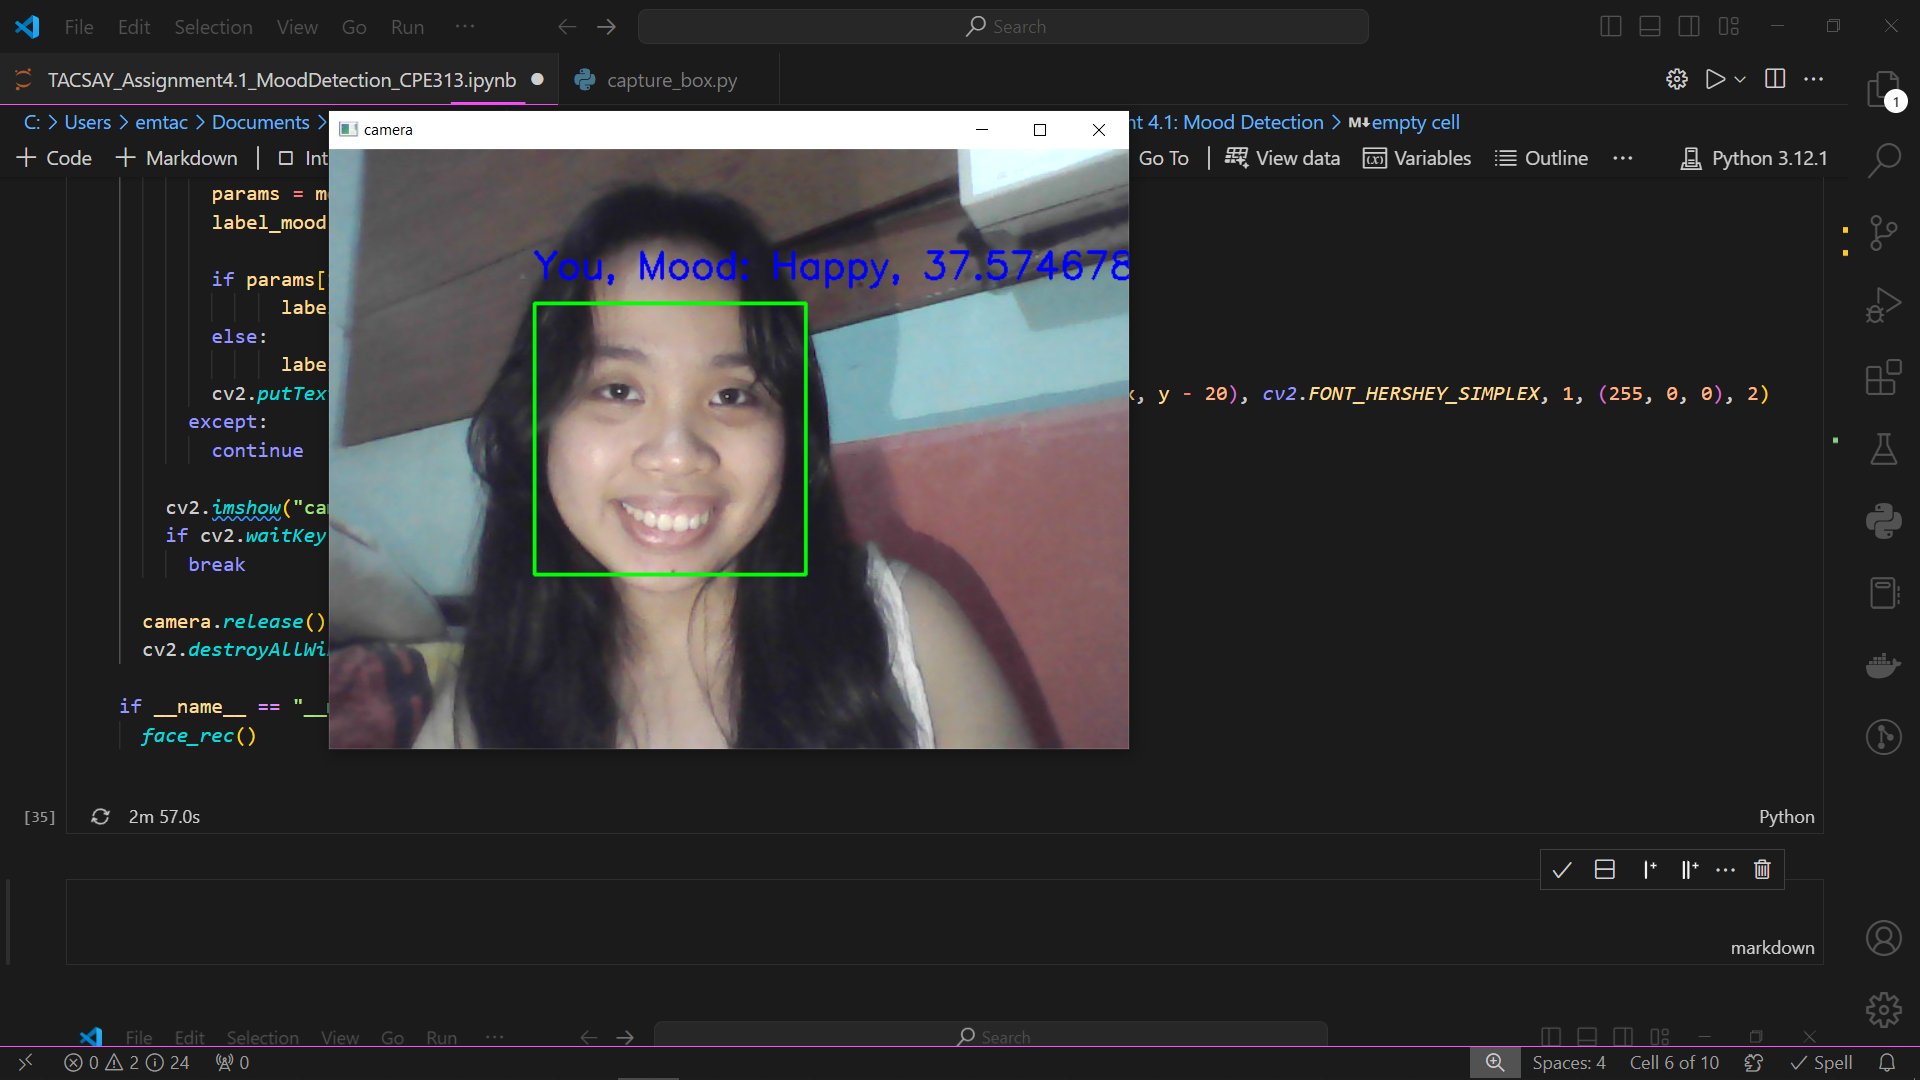

## **Angry (Mood)**

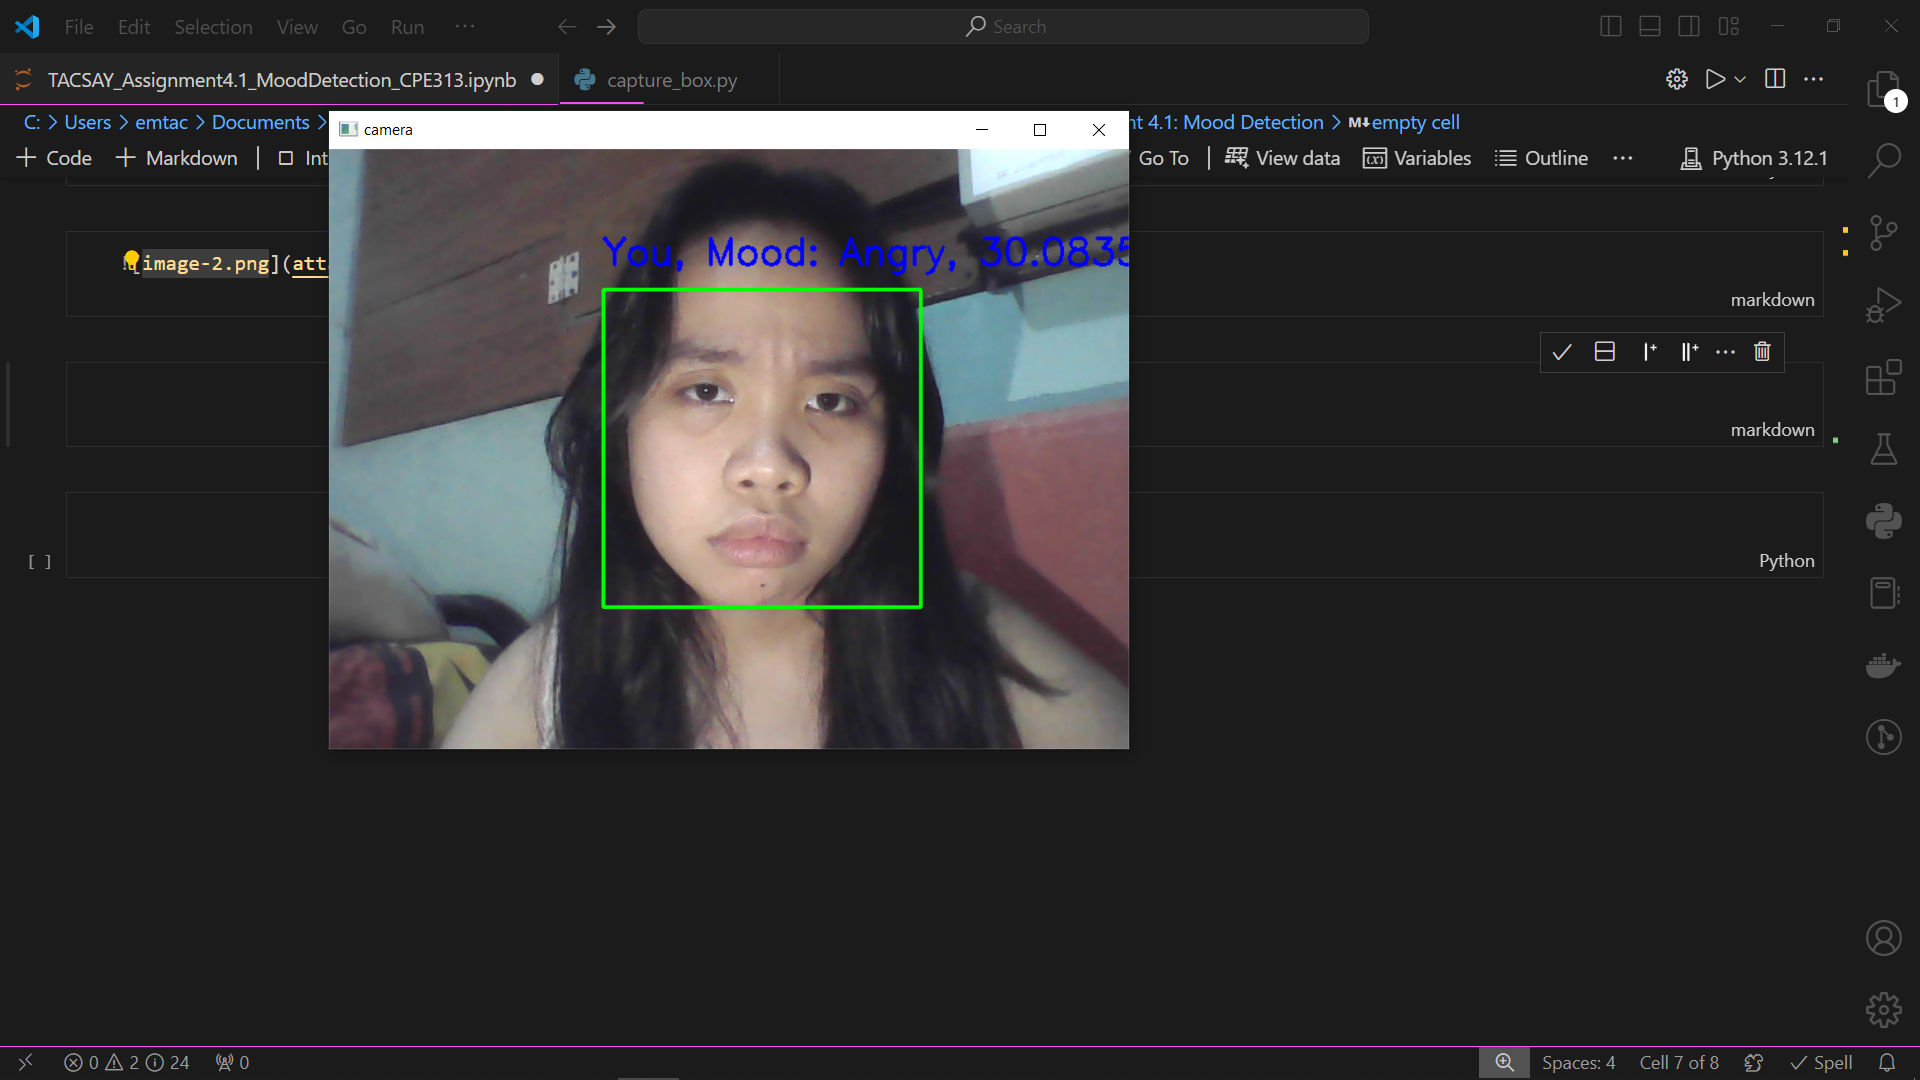

## **Sad (Mood)**

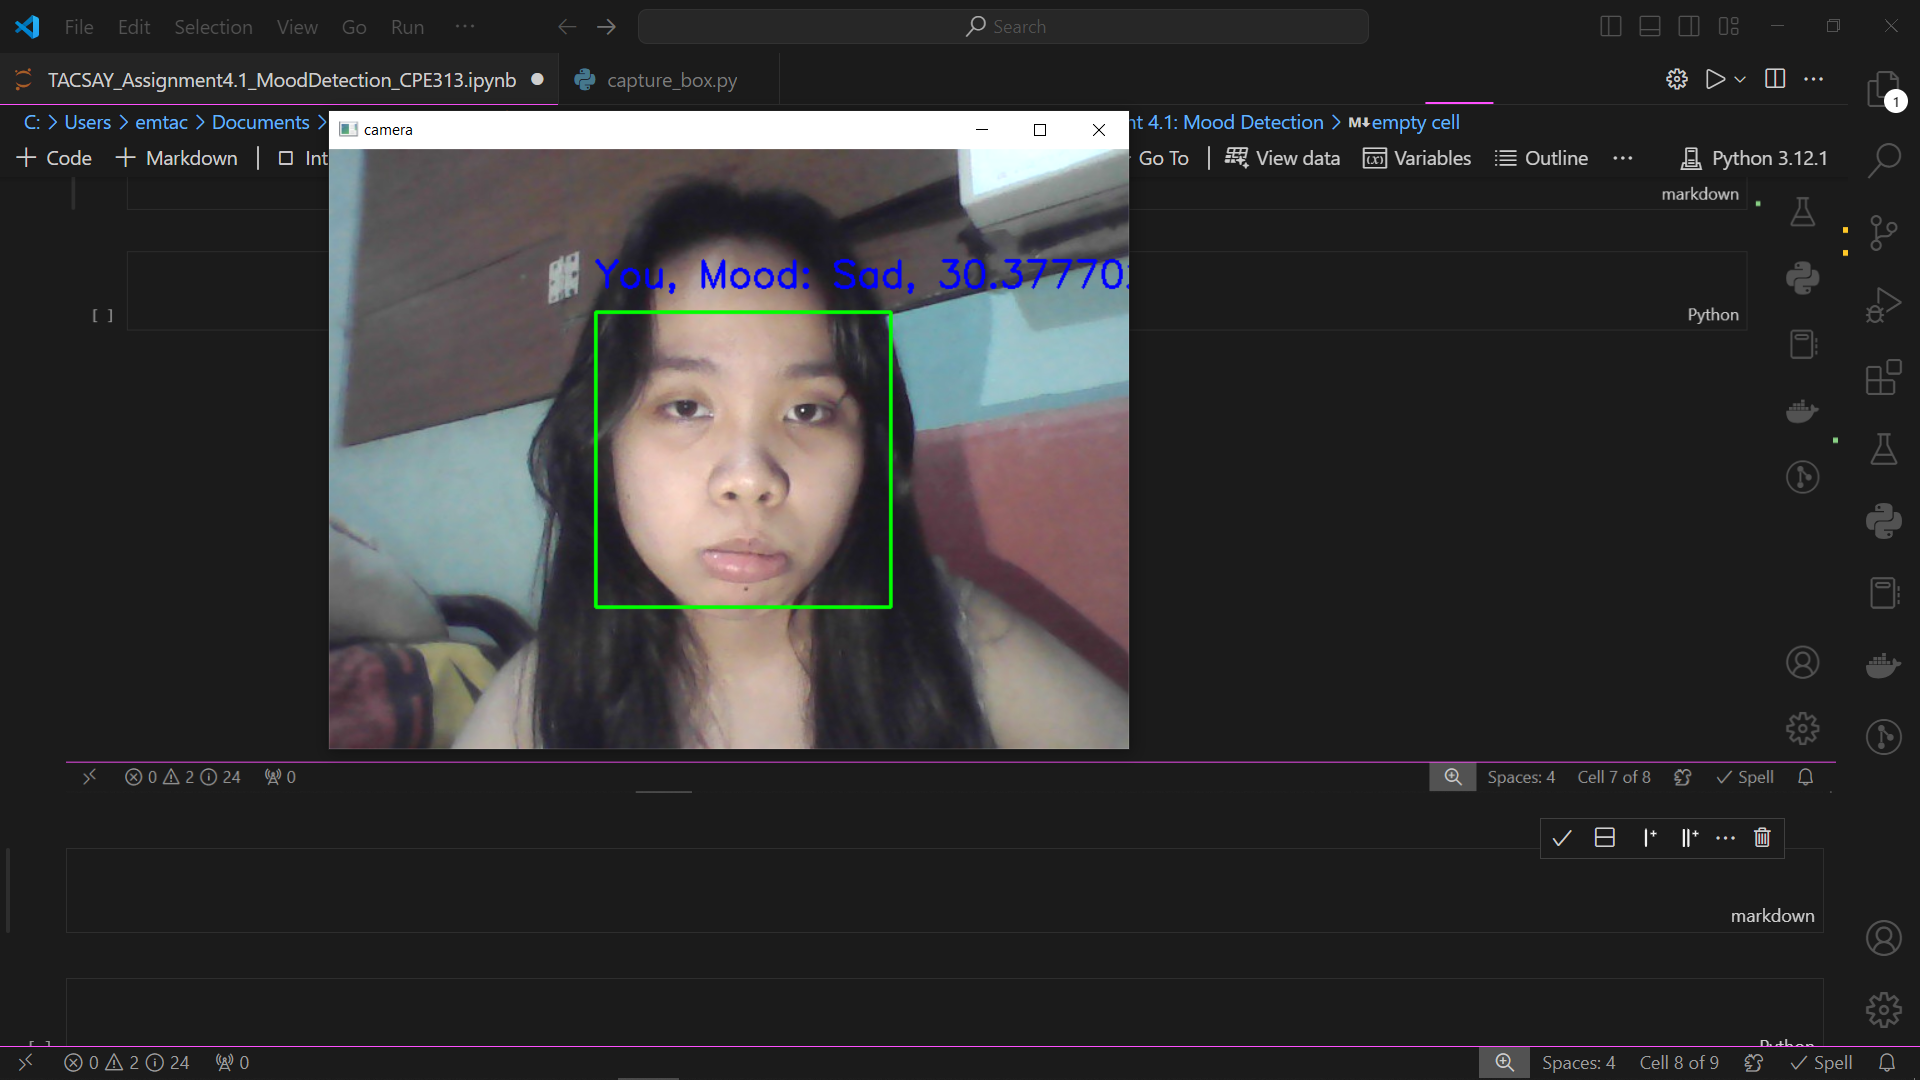

## **Confused (Mood)**

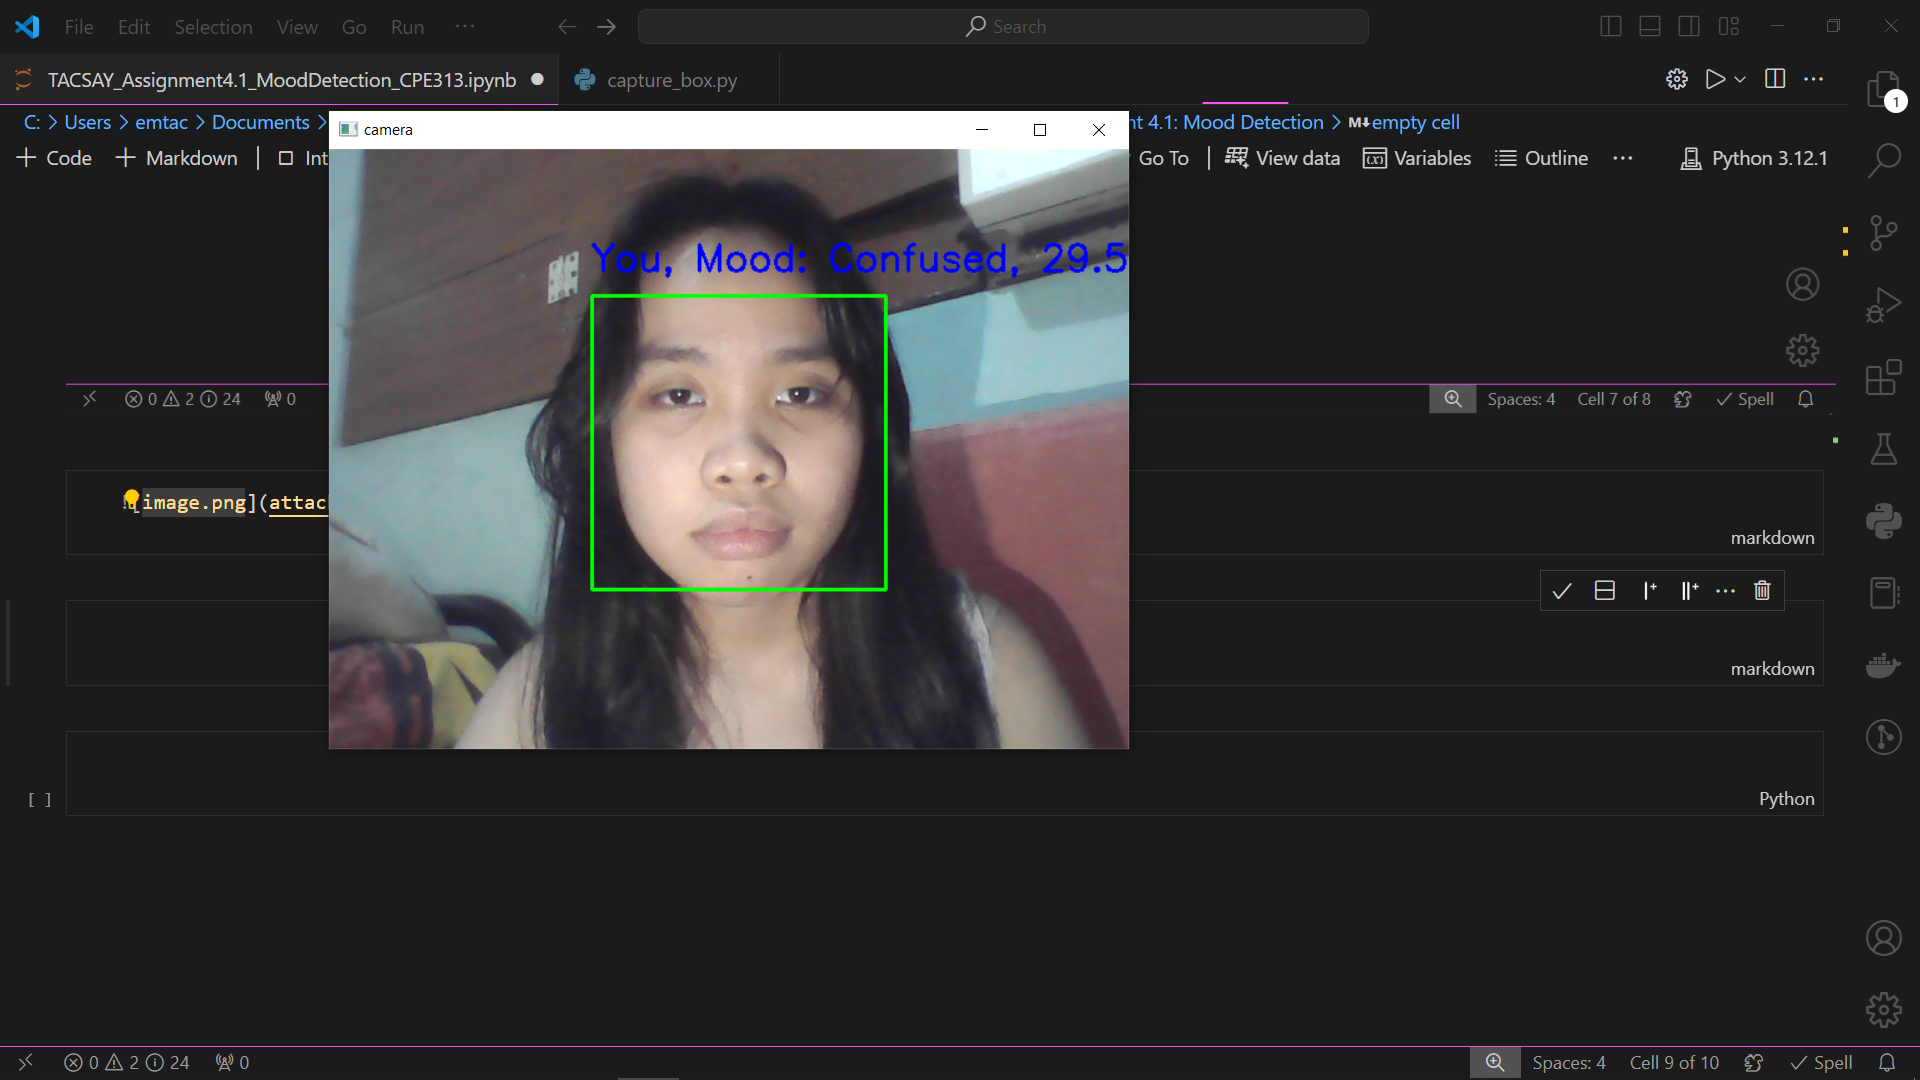

## **Detecting if it's you or not**

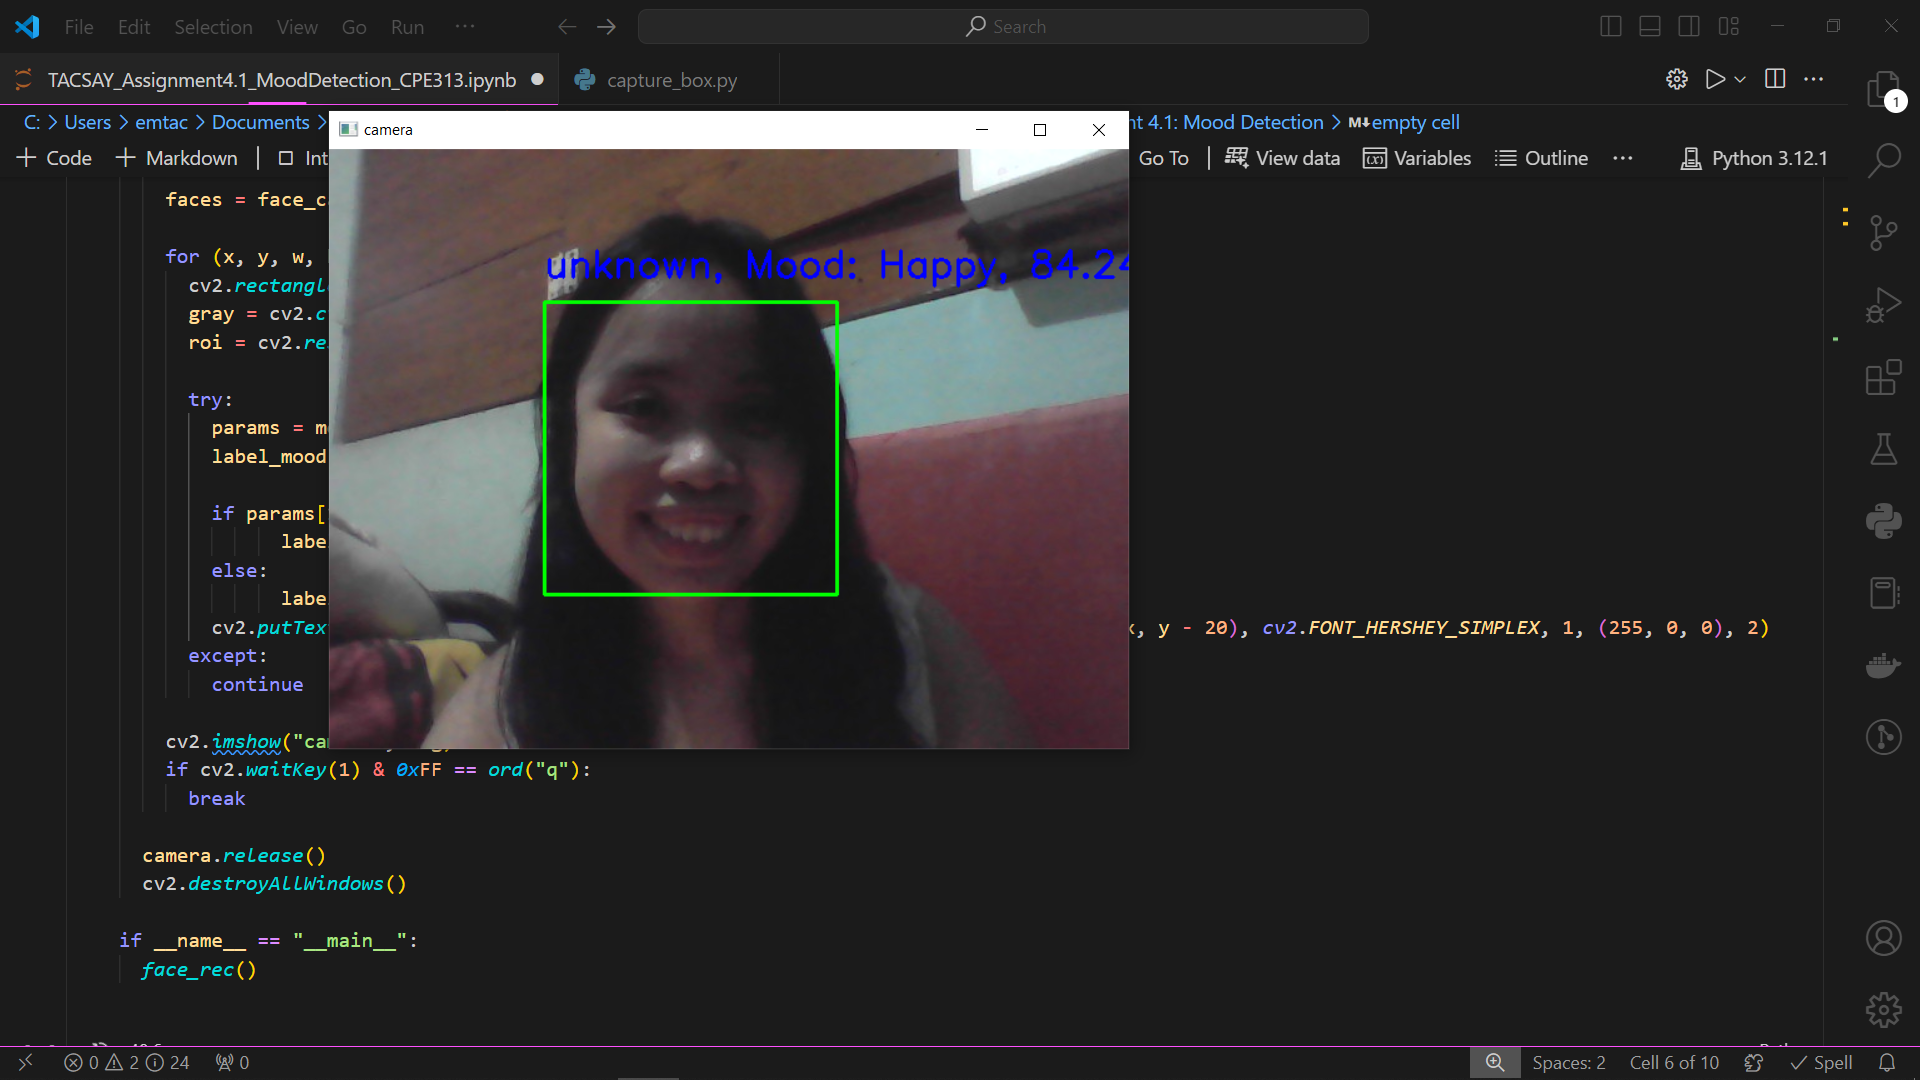

## **Conclusion**

In this activity, we were challenged to use our knowledge when it comes to applying the concepts of computer vision. This field of technology is still improving and finding possible areas where it can be applied and solve a certain problem. Just like machine learning, this concept of technology also depends on data which indicated that data is an important factor in terms of creating automation machines or intellectual machines that are systemized or programmed to do a certain task. This activity shows how a code would be able to determine the mood of a person depending on its facial expressions. Through adding some data, the model used would be able to recognize the needed moods for this activity. Also, using the confidence level (param[1]) of the model, this would be the condition in order to determine if the person in front of the camera is the creator (me) or just random objects or person detected. If this param would not meet the condition it will display "unknown", stating that it is not the face of the creator (me) that was detected and recognized. All in all, this activity is challenging one since we should be able to detect both the mood and face (own's face) which means that modification is needed. But I still manage to do it and provide results which satisfied the needed requirements for this assignment.

### **“I accept responsibility for my role in ensuring the integrity of the work submitted by the group in which I participated.”**